In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #Up-pull and Down-pull operations
        self.pull_1 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
        self.pull_2 = nn.MaxPool2d(kernel_size=3, stride=1,padding=1, return_indices=True)
        self.unpull = nn.MaxUnpool2d(kernel_size=4, stride=2,padding=1)
        
        # Downsampling convolution
        self.down_conv1 = nn.Conv2d(1, 64, 3, 1, 1)
        self.down_conv2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.down_conv3 = nn.Conv2d(128, 256, 3, 1, 1)
        self.down_conv4 = nn.Conv2d(256, 512, 3, 1, 1)
        self.down_conv5 = nn.Conv2d(512, 1024, 3, 1, 1)

        # Upsampling convolution
        self.up_conv5 = nn.ConvTranspose2d(1024, 512, 3, 1, 1)
        self.up_conv4 = nn.ConvTranspose2d(512, 256, 3, 1, 1)
        self.up_conv3 = nn.ConvTranspose2d(256, 128, 3, 1, 1)
        self.up_conv2 = nn.ConvTranspose2d(128, 64, 3, 1, 1)
        self.up_conv1 = nn.ConvTranspose2d(64, 1, 3, 1, 1)
        


    def forward(self, x):
        # DownSampling
        x = self.pull_1(F.relu(self.down_conv1(x)))
        x,indconv1 = self.pull_2(x)
        
        x = self.pull_1(F.relu(self.down_conv2(x)))
        x,indconv2 = self.pull_2(x)
        
        x = self.pull_1(F.relu(self.down_conv3(x)))
        x,indconv3 = self.pull_2(x)
        
        x = self.pull_1(F.relu(self.down_conv4(x)))
        x,indconv4 = self.pull_2(x)
        
        x = self.pull_1(F.relu(self.down_conv5(x)))
        x,indconv5 = self.pull_2(x)
        
        
        # UpSampling started
        x = F.relu(self.up_conv5(self.unpull(x,indconv5)))
        
        x = F.relu(self.up_conv4(self.unpull(x,indconv4)))
        
        x = F.relu(self.up_conv3(self.unpull(x,indconv3)))
        
        x = F.relu(self.up_conv2(self.unpull(x,indconv2)))
        
        x = F.relu(self.up_conv1(self.unpull(x,indconv1)))
        
        x = x.view(-1, self.num_flat_features(x))
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        
    
model = Net().double()

In [23]:
import numpy as np
import DataLoader as dl
dataloader = dl.LitsDataSet.create(root_dir = 'VolSegData1/', batch_size = 100,shuffle = True, num_workers = 0)
data = None
label = None
for i_batch, sample_batched in enumerate(dataloader):
        print(i_batch, sample_batched['scan'].size(),
          sample_batched['segmentation'].size())
        if i_batch == 0:
            data = sample_batched['scan'][:1,:]
            label = sample_batched['segmentation'][:1,:]
            break

0 torch.Size([100, 1, 512, 512]) torch.Size([100, 1, 512, 512])


In [24]:
g = model.forward(data)

In [19]:
img = g.detach().numpy().reshape(512,512)

In [ ]:
from torchvision import transforms

In [ ]:
tr = transforms.Compose([transforms.Normalize(mean=[0],std=[1])])

In [ ]:
data.shape

In [ ]:
data.std()

In [ ]:
img = g.detach().numpy().reshape(512,512)
img.shape

In [ ]:
img.max()

In [ ]:
data

In [ ]:
pool = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
pool1 = nn.MaxPool2d(kernel_size=3, stride=1,padding=1, return_indices=True)
unpool = nn.MaxUnpool2d(kernel_size=4, stride=2,padding=1)

In [ ]:
x = model.down_conv1(data)
print(x.shape)
x = pool(x)
x,indconv1 = pool1(x)
print(x.shape)

In [ ]:
x = model.down_conv2(x)
print(x.shape)
x = pool(x)
x,indconv2 = pool1(x)
print(x.shape)

In [ ]:
x = model.down_conv3(x)
print(x.shape)
x = pool(x)
x,indconv3 = pool1(x)
print(x.shape)

In [ ]:
x = model.down_conv4(x)
print(x.shape)
x = pool(x)
x,indconv4 = pool1(x)
print(x.shape)

In [ ]:
x = model.down_conv5(x)
print(x.shape)
x = pool(x)
print(x.shape)
x,indconv5 = pool1(x)
print(indconv5.shape)
print(x.shape)

# --------- UpSampling

In [ ]:
print(x.shape)
x = unpool(x,indconv5)
print(x.shape)
x = model.up_conv5(x)
print(x.shape)

In [ ]:
print(x.shape)
x = unpool(x,indconv4)
print(x.shape)
x = model.up_conv4(x)
print(x.shape)

In [ ]:
print(x.shape)
x = unpool(x,indconv3)
print(x.shape)
x = model.up_conv3(x)
print(x.shape)

In [ ]:
print(x.shape)
x = unpool(x,indconv2)
print(x.shape)
x = model.up_conv2(x)
print(x.shape)

In [ ]:
print(x.shape)
x = unpool(x,indconv1)
print(x.shape)
x = model.up_conv1(x)
print(x.shape)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

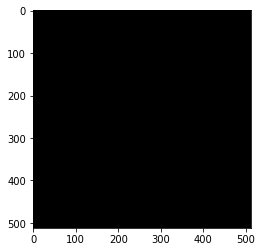

In [25]:
# plt.imshow(np.array(x).reshape(512,512))a
# img = x.detach().numpy().reshape(512,512)
plt.imshow(img,cmap='gray')

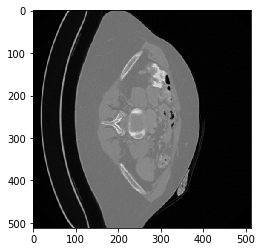

In [26]:
img = data.detach().numpy().reshape(512,512)
plt.imshow(img,cmap='gray')

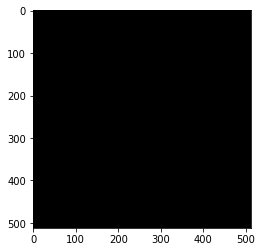

In [27]:
img = label.detach().numpy().reshape(512,512)
plt.imshow(img,cmap='gray')

In [ ]:
img.max()

In [ ]:
data.max()

# rough 

In [ ]:
pool = nn.MaxPool2d(3, stride=2,padding=1)
pool1 = nn.MaxPool2d(3, stride=1,padding=1, return_indices=True)
unpool = nn.MaxUnpool2d(4, stride=2,padding=1)
inputs = torch.from_numpy(np.random.randn(1,1,10,10))

output = pool(inputs)
output,indices = pool1(output)
out = unpool(output,indices)

print(inputs.shape)
print(output.shape)
print(indices.shape)
print(out.shape)

# Improvised Net 

In [ ]:
?F.linear

In [ ]:
x.shape

In [ ]:
x.view(-1).view(1,-1).shape

In [ ]:
512*512

In [ ]:
x.view(-1,262144).shape

In [ ]:
x.view(1,-1).shape

In [ ]:
x[1:,:].view(1,-1)

In [ ]:
x.size()[1:]

In [ ]:
x.size()

In [ ]:
x = np.random.randn(2,4)

In [ ]:
(*x.shape,1)

In [ ]:
std = lambda x : (x-x.min())/(x.max()-x.mean()) if not (x.min() == x.max() == 0) else x

In [ ]:
img = std(data).detach().numpy().reshape(512,512)

In [ ]:
img